<a href="https://colab.research.google.com/github/dibyam1101/IE-Stocks-Price-Predictor/blob/main/Stocks_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install yfinance
import yfinance as yf
ticker = yf.Ticker('MSFT')

In [146]:
df = ticker.history(period='max')
df.to_csv("stocks.csv")

In [147]:
import pandas as pd
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055898,0.064119,0.055898,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0


In [148]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-14,304.250000,310.820007,303.750000,310.200012,39823500,0.0,0.0
2022-01-18,304.070007,309.799988,301.739990,302.649994,42333200,0.0,0.0
2022-01-19,306.290009,313.910004,302.700012,303.329987,45933900,0.0,0.0
2022-01-20,309.070007,311.649994,301.140015,301.600006,35380700,0.0,0.0
2022-01-21,302.690002,304.109985,295.609985,296.029999,57118300,0.0,0.0


In [149]:
df1 = df.reset_index()['Close']
df1 = df1
df1
df2 = pd.DataFrame(df1)

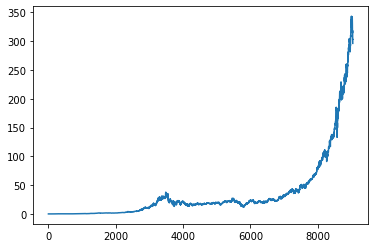

In [150]:
df1.plot()

In [151]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[1.27790406e-05],
       [1.91686423e-05],
       [2.23652513e-05],
       ...,
       [8.84041242e-01],
       [8.78998346e-01],
       [8.62761766e-01]])

In [152]:
training_size=int(len(df1)*0.95)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [153]:
len(test_data) + len(train_data), len(df1)

(9040, 9040)

In [154]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
len(X_test), len(y_test)
y_test

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [157]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train.shape, y_train.shape

((8487, 100, 1), (8487,))

In [158]:
model = Sequential()

In [159]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [160]:
model.compile(optimizer = 'adam', loss = 'mse')

In [161]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, verbose=1)

266/266 [==============================] - 47s 155ms/step - loss: 2.3288e-04 - val_loss: 0.0032


In [162]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [163]:
import matplotlib.pyplot as plt

In [164]:
print(len(train_predict), len(test_predict), len(df1))

8487 351 9040


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


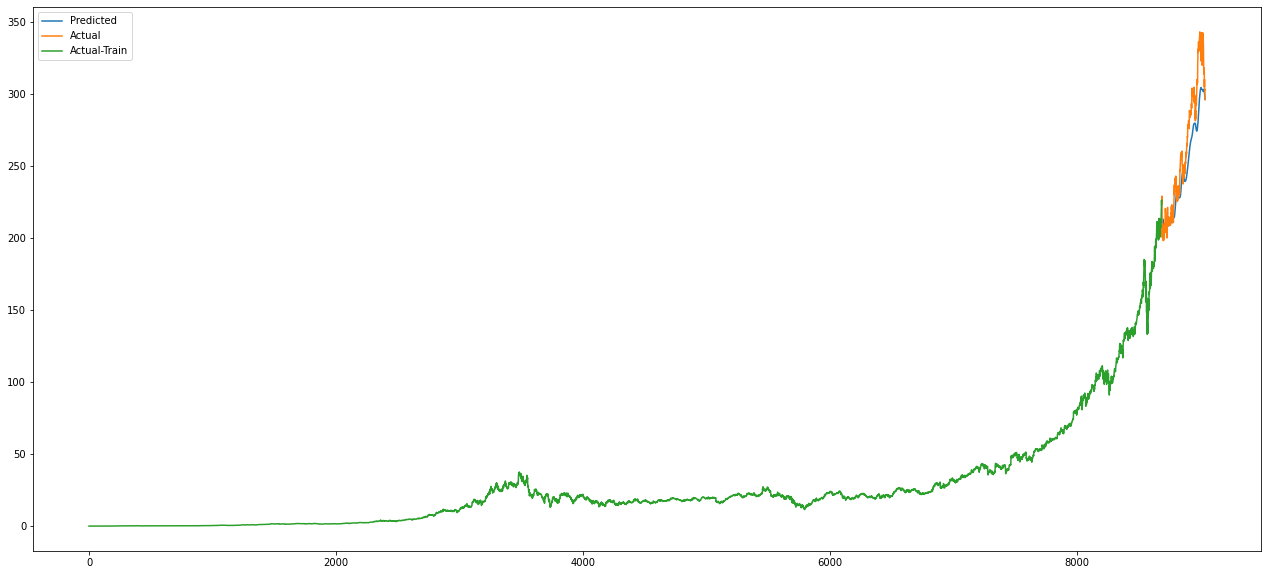

In [165]:
len(test_predict)
l = len(df2) - len(test_predict)
test = df2[l:]
train = df2[:l]
len(test)
test['Predictions'] = test_predict
plt.figure(figsize=(22, 10))
plt.plot(test[['Predictions', 'Close']])
plt.plot(train.Close)
plt.legend(['Predicted', 'Actual', 'Actual-Train'])



In [ ]:
type(test_predict)
(test_predict)

In [167]:
pred = []

prediction_data = [i[0] for i in test_predict[::-1][:100][::-1]]
i = 0
newScaler = MinMaxScaler(feature_range=(0, 1))

while i < 500:

  new_prediction_data = newScaler.fit_transform(np.array(prediction_data).reshape(-1, 1))
  predicted_value = newScaler.inverse_transform(model.predict(np.array(new_prediction_data).reshape((1, 100, 1))))
  pred.append(predicted_value[0][0])
  # print(predicted_value)
  prediction_data = prediction_data[1:]
  prediction_data.append(predicted_value[0][0])
  
  i = i+1

 




In [ ]:
len(pred), pred

In [169]:
future_pred = pd.DataFrame(df2)

In [170]:
future_pred
for i in range(500):
  future_pred.loc[future_pred.shape[0]] = [None]
future_pred

,Close
0,0.061378
1,0.063570
2,0.064667
3,0.063022
4,0.061926
...,...
9535,NaN
9536,NaN
9537,NaN
9538,NaN


In [171]:
len(future_pred), len(df2)

(9540, 9040)

In [172]:
abcd = future_pred[(len(df2)):]


In [173]:
abcd['predictions'] = pred


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
abcd

,Close,predictions
9040,NaN,299.878479
9041,NaN,299.688110
9042,NaN,299.494263
9043,NaN,299.305634
9044,NaN,299.127106
...,...,...
9535,NaN,296.542847
9536,NaN,296.542877
9537,NaN,296.542877
9538,NaN,296.542877


In [175]:
pred

[299.87848,
 299.6881,
 299.49426,
 299.30563,
 299.1271,
 298.96066,
 298.80658,
 298.66397,
 298.53146,
 298.40756,
 298.2908,
 298.17987,
 298.07367,
 297.9714,
 297.8724,
 297.77615,
 297.6824,
 297.59082,
 297.5013,
 297.41376,
 297.328,
 297.24405,
 297.16183,
 297.0813,
 297.00244,
 296.92517,
 296.8495,
 296.77533,
 296.7027,
 296.63147,
 296.56168,
 296.49326,
 296.42615,
 296.363,
 296.3133,
 296.27756,
 296.25482,
 296.24234,
 296.23917,
 296.24252,
 296.2494,
 296.25867,
 296.2754,
 296.30038,
 296.33487,
 296.37534,
 296.41852,
 296.4598,
 296.4943,
 296.51645,
 296.52158,
 296.5075,
 296.47845,
 296.44693,
 296.43427,
 296.44012,
 296.44614,
 296.45184,
 296.45712,
 296.46194,
 296.46637,
 296.4704,
 296.47418,
 296.47775,
 296.4812,
 296.4846,
 296.4879,
 296.49124,
 296.49393,
 296.49606,
 296.49808,
 296.50018,
 296.50235,
 296.50504,
 296.5082,
 296.5113,
 296.5143,
 296.51733,
 296.5203,
 296.52322,
 296.52615,
 296.52905,
 296.53198,
 296.5349,
 296.5378,
 296.5407,

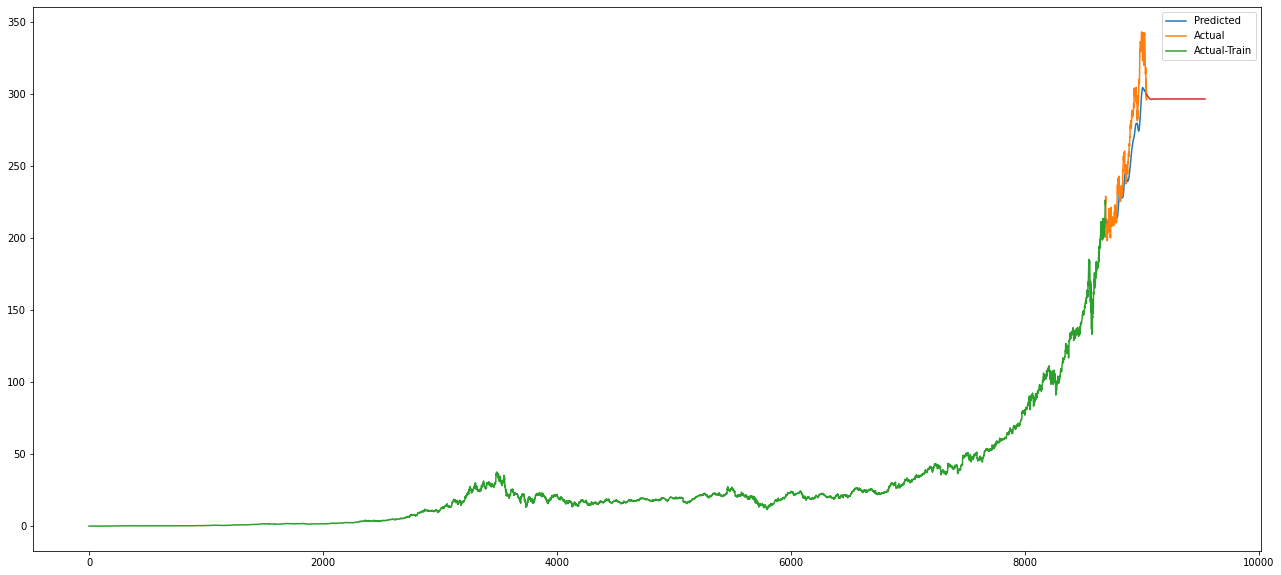

In [176]:
plt.figure(figsize=(22, 10))
plt.plot(test[['Predictions', 'Close']])
plt.plot(train.Close)
plt.legend(['Predicted', 'Actual', 'Actual-Train', 'Future'])
plt.plot(abcd['predictions'])